# Recurrent Neural Network

![LSTM](imgs/LSTM3-chain.png)

![LSTM](imgs/LSTM2-notation.png)



![LSTM](imgs/LSTM3-focus-f.png)

![LSTM](imgs/LSTM3-focus-i.png)

![LSTM](imgs/LSTM3-focus-C.png)

![LSTM](imgs/LSTM3-focus-o.png)

## From pytorch documentation

\begin{array}{ll} \\
    f_t = \sigma(W_{if} x_t + b_{if} + W_{hf} h_{(t-1)} + b_{hf}) \\
    i_t = \sigma(W_{ii} x_t + b_{ii} + W_{hi} h_{(t-1)} + b_{hi}) \\
    g_t = \tanh(W_{ig} x_t + b_{ig} + W_{hg} h_{(t-1)} + b_{hg}) \\
    c_t = f_t * c_{(t-1)} + i_t * g_t \\
    o_t = \sigma(W_{io} x_t + b_{io} + W_{ho} h_{(t-1)} + b_{ho}) \\    
    h_t = o_t * \tanh(c_t) \\
\end{array}

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

batch_size = 2
seq_len = 10
input_size = 3
hidden_size = 4 

inputs = torch.randn(seq_len, batch_size, input_size)
inputs

In [ ]:
lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size)

In [ ]:
## hidden_0 = (h_0, c_0)
hidden_0 = (torch.zeros(1, batch_size, hidden_size), torch.zeros(1, batch_size, hidden_size))

In [ ]:
lstm_out, lstm_hidden = lstm(inputs)
lstm_out.shape

In [5]:
lstm_out

tensor([[[-0.0299,  0.1668,  0.0243,  0.0144],
         [-0.0768,  0.0104, -0.0325, -0.1756]],

        [[-0.0837,  0.1039, -0.0421, -0.1588],
         [-0.1035,  0.1413, -0.0930, -0.1513]],

        [[-0.0694, -0.0477,  0.0200, -0.0866],
         [-0.1063,  0.1324, -0.0662, -0.1797]],

        [[ 0.0042,  0.1869, -0.0824, -0.0120],
         [-0.1908,  0.3426,  0.0453, -0.0387]],

        [[-0.0380,  0.1472, -0.1476, -0.1807],
         [-0.0675,  0.0157,  0.0231, -0.1499]],

        [[-0.0297,  0.1242, -0.1958, -0.3778],
         [-0.0506, -0.0345, -0.0547, -0.2500]],

        [[-0.0675,  0.2927, -0.0151, -0.0446],
         [-0.0991,  0.0627,  0.0881, -0.0023]],

        [[ 0.0313,  0.4282, -0.0358, -0.0304],
         [-0.1195,  0.1341,  0.0754, -0.0027]],

        [[-0.1459,  0.1669,  0.0332, -0.0562],
         [-0.1035,  0.0443,  0.0395, -0.0555]],

        [[-0.1492,  0.1285,  0.0549, -0.0889],
         [-0.1346,  0.1317, -0.0328, -0.1172]]], grad_fn=<StackBackward>)

If we want to put hidden inputs to zeros, there is no need to provide them.

In [6]:
lstm_out, lstm_hidden = lstm(inputs)
lstm_out

tensor([[[-0.0299,  0.1668,  0.0243,  0.0144],
         [-0.0768,  0.0104, -0.0325, -0.1756]],

        [[-0.0837,  0.1039, -0.0421, -0.1588],
         [-0.1035,  0.1413, -0.0930, -0.1513]],

        [[-0.0694, -0.0477,  0.0200, -0.0866],
         [-0.1063,  0.1324, -0.0662, -0.1797]],

        [[ 0.0042,  0.1869, -0.0824, -0.0120],
         [-0.1908,  0.3426,  0.0453, -0.0387]],

        [[-0.0380,  0.1472, -0.1476, -0.1807],
         [-0.0675,  0.0157,  0.0231, -0.1499]],

        [[-0.0297,  0.1242, -0.1958, -0.3778],
         [-0.0506, -0.0345, -0.0547, -0.2500]],

        [[-0.0675,  0.2927, -0.0151, -0.0446],
         [-0.0991,  0.0627,  0.0881, -0.0023]],

        [[ 0.0313,  0.4282, -0.0358, -0.0304],
         [-0.1195,  0.1341,  0.0754, -0.0027]],

        [[-0.1459,  0.1669,  0.0332, -0.0562],
         [-0.1035,  0.0443,  0.0395, -0.0555]],

        [[-0.1492,  0.1285,  0.0549, -0.0889],
         [-0.1346,  0.1317, -0.0328, -0.1172]]], grad_fn=<StackBackward>)

Finally the last output is the output of RRR. We can get it by

In [7]:
lstm_out[-1]

tensor([[-0.1492,  0.1285,  0.0549, -0.0889],
        [-0.1346,  0.1317, -0.0328, -0.1172]], grad_fn=<SelectBackward>)

It is often convient to have batches as the first dimension of the input. One can do it by adding `batch_first=True` parameter.

In [8]:
lstm_batch_first = nn.LSTM(input_size=input_size, hidden_size=hidden_size, batch_first=True) 
inputs_batch_first = torch.randn(batch_size, seq_len, input_size)
inputs_batch_first

tensor([[[-0.5353,  0.2963,  0.1498],
         [-0.3241,  0.7809,  0.1792],
         [ 1.0528, -0.5501,  0.3137],
         [ 1.0422, -1.1246,  0.5430],
         [ 1.4121, -0.9867,  0.1293],
         [-0.2408,  2.3817, -0.1098],
         [ 0.1807,  0.3314, -1.0077],
         [ 0.1203,  0.0134, -0.1932],
         [ 0.9413,  0.7572, -1.1836],
         [-0.0453,  0.0241, -0.6344]],

        [[ 1.7979,  0.3554,  1.3758],
         [-0.4562,  0.5411,  0.0063],
         [-0.7040,  0.2585,  0.1255],
         [ 0.1649, -1.6586, -0.6749],
         [ 2.0979, -0.5523, -0.1197],
         [-0.4566, -1.6408,  0.6930],
         [ 0.7879, -0.1795,  0.4447],
         [-1.6472, -0.9431, -0.3560],
         [ 0.3737,  0.1944, -1.1263],
         [-1.0246, -0.7168,  0.3650]]])

In [9]:
lstm_out, lstm_hidden = lstm_batch_first(inputs_batch_first)
lstm_out

tensor([[[ 0.0915,  0.0467, -0.0404, -0.0004],
         [ 0.0635,  0.0561, -0.0769, -0.0476],
         [-0.0006,  0.0280,  0.1081,  0.1938],
         [ 0.0631,  0.0140,  0.1391,  0.2828],
         [-0.0103, -0.0083,  0.1382,  0.2786],
         [-0.0672,  0.0307,  0.0507, -0.0795],
         [-0.1571,  0.0734,  0.0449, -0.0384],
         [-0.0577,  0.0881,  0.0481,  0.0914],
         [-0.2330,  0.0529,  0.0840,  0.0556],
         [-0.1159,  0.0950,  0.0578,  0.0899]],

        [[-0.0219,  0.0018,  0.1494,  0.1525],
         [ 0.0556,  0.0502,  0.0301,  0.0377],
         [ 0.1186,  0.0772, -0.0304,  0.0076],
         [ 0.0869,  0.0407,  0.0714,  0.2884],
         [-0.1217, -0.0095,  0.1357,  0.2347],
         [ 0.1495,  0.0206,  0.1275,  0.3637],
         [ 0.0788, -0.0014,  0.1637,  0.2802],
         [ 0.2336,  0.0570,  0.0615,  0.1754],
         [-0.0523,  0.0070,  0.0933,  0.0990],
         [ 0.1646,  0.0661,  0.0414,  0.1819]]], grad_fn=<TransposeBackward0>)

Then we get the finial output by:

In [10]:
lstm_out[:, -1]

tensor([[-0.1159,  0.0950,  0.0578,  0.0899],
        [ 0.1646,  0.0661,  0.0414,  0.1819]], grad_fn=<SelectBackward>)

## Embedings

In [11]:
dict_size = 100
sentences = torch.randint(dict_size, (batch_size, seq_len))
sentences

tensor([[12,  5, 76, 49,  8, 49, 60, 83, 41, 29],
        [19,  3, 85,  0, 50, 14, 68, 47,  3,  1]])

In [12]:
embedding_dim = 3
embedding = nn.Embedding(dict_size, embedding_dim)

In [13]:
sentences_embedded = embedding(sentences)
sentences_embedded

tensor([[[-1.2196,  0.6031, -0.4558],
         [ 1.0393, -0.0342, -0.5091],
         [ 1.8944, -0.5545,  1.0928],
         [ 0.4852,  0.7222, -0.0678],
         [ 0.5222, -0.6337, -1.0984],
         [ 0.4852,  0.7222, -0.0678],
         [-1.0099, -1.2522,  1.1252],
         [-0.8211,  0.3858,  0.6533],
         [ 0.2912,  0.3577,  0.1148],
         [ 1.5376, -0.3341, -0.6996]],

        [[ 1.2343,  0.6949, -2.0666],
         [ 0.1641,  0.3015, -0.6134],
         [ 0.4257, -0.7820, -0.3327],
         [-0.7738, -0.1896,  0.4735],
         [ 1.3434, -0.0107,  1.1181],
         [-0.1866,  2.2336, -0.3407],
         [ 1.0563, -0.2882,  1.3992],
         [-0.1661,  0.7801,  0.1108],
         [ 0.1641,  0.3015, -0.6134],
         [ 1.3613,  0.9567, -0.0597]]], grad_fn=<EmbeddingBackward>)

In [14]:
lstm_out, _ = lstm_batch_first(sentences_embedded)
lstm_out[:, -1]

tensor([[-0.1609, -0.0006,  0.1093,  0.2144],
        [-0.1601,  0.0300,  0.1046,  0.0955]], grad_fn=<SelectBackward>)

### Natural Language Processing (NLP)

Next we consider a dataset with text and the goal is to evaluate whether they are toxic or non-toxic.

You can download the dataset in the following link:

[here](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge). 


In [15]:
import pandas as pd

comments_df = pd.read_csv("data/jigsaw-toxic-comment-classification-challenge/train.csv")[:10000]
comments_df.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0


In [16]:
from sklearn.model_selection import train_test_split
label_colnames = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

X_train, X_test, y_train, y_test = \
    train_test_split(comments_df[['comment_text']], comments_df[label_colnames], random_state=667)
X_train.head(2)

,comment_text
1911,your support for Chris Lawson \n\nAre you sure...
5578,Apologies for the above litany of bot-generate...


In [17]:
import re

import nltk
from nltk.stem import SnowballStemmer

BAD_SYMBOLS_RE = re.compile('[^0-9a-z ]')
STEMMER = SnowballStemmer('english')

class TextPreprocessor:
        
    def transfrom_text(self, text):
        text = text.lower()
        text = re.sub(BAD_SYMBOLS_RE, " ", text) # process bad symbols
        # text = " ".join([STEMMER.stem(word) for word in text.split()])
        return text
    
    def transform(self, series):
        return series.apply(lambda text: self.transfrom_text(text))

In [18]:
preprocessor = TextPreprocessor()
X_train_preprocessed = preprocessor.transform(X_train['comment_text'])
X_test_preprocessed = preprocessor.transform(X_test['comment_text'])

In [19]:
print(X_train["comment_text"].iloc[0])
print('---------------------------------------------------------------------------------------------------------------------')
print(X_train_preprocessed.iloc[0])

your support for Chris Lawson 

Are you sure you want to support this guy?  Look at his source/quote for making the Red Baron jewish.  read the discussion page  on it. See the opposers views on his request page.  It scares me.   JohnHistory

http://en.wikipedia.org/wiki/Talk:Manfred_von_Richthofen

http://en.wikipedia.org/wiki/Wikipedia:Requests_for_adminship/Clawson
---------------------------------------------------------------------------------------------------------------------
your support for chris lawson   are you sure you want to support this guy   look at his source quote for making the red baron jewish   read the discussion page  on it  see the opposers views on his request page   it scares me    johnhistory  http   en wikipedia org wiki talk manfred von richthofen  http   en wikipedia org wiki wikipedia requests for adminship clawson


In [20]:
print(X_train["comment_text"].iloc[1])
print('---------------------------------------------------------------------------------------------------------------------')

print(X_train_preprocessed.iloc[1])

Apologies for the above litany of bot-generated warnings and threats.  I think the bot needs its rules adjusted, and have notified the operator accordingly.   (call me Russ)
---------------------------------------------------------------------------------------------------------------------
apologies for the above litany of bot generated warnings and threats   i think the bot needs its rules adjusted  and have notified the operator accordingly     call me russ 


In [21]:
def create_dicts(text):
    word_set = set()
    words = text.split()
    for word in words:
        word_set.add(word)
    word_list = ["<UNK>", "<PAD>"] + sorted(list(word_set))
    word2idx = {word_list[idx]: idx for idx in range(len(word_list))}
    idx2word = {idx: word_list[idx] for idx in range(len(word_list))}
    return word2idx, idx2word

class Tokenizer:
    
    def __init__(self):
        self.word2idx = None
        self.idx2word = None
        
    def fit(self, X):
        text = " ".join(X)
        self.word2idx, self.idx2word = create_dicts(text)
    
    def transform(self, X):
        return [self.transform_line(line) for line in X]
        
    def transform_line(self, line):
        return [self.word2idx.get(word, 0) for word in line.split()]

In [22]:
tokenizer = Tokenizer()
tokenizer.fit(X_train_preprocessed)
tokenizer.fit(X_test_preprocessed)

In [23]:
X_train_tokenized = tokenizer.transform(X_train_preprocessed)
X_test_tokenized = tokenizer.transform(X_test_preprocessed)

In [24]:
class Cutter:

    def __init__(self, size=150):
        self.size = size
        
    def transform(self, X):
        new_X = []
        for line in X:
            new_line = line[:self.size]
            new_line = new_line + [1] * (self.size - len(new_line))
            new_X.append(new_line)
        return new_X    

In [25]:
cutter = Cutter()
X_train_cutted = cutter.transform(X_train_tokenized)
X_test_cutted = cutter.transform(X_test_tokenized)

In [26]:
labels = torch.from_numpy(y_train.values)
labels

tensor([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0],
        ...,
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]])

In [27]:
train_data = TensorDataset(torch.tensor(X_train_cutted), torch.from_numpy(y_train.values).float())
test_data = TensorDataset(torch.tensor(X_test_cutted), torch.from_numpy(y_test.values).float())


batch_size = 32

train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=len(test_data))

In [28]:
class LSTMModel(nn.Module):
    
    def __init__(self, dict_size, output_size, embedding_dim, hidden_dim):
        super().__init__()
        self.embedding = nn.Embedding(dict_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        embeded = self.embedding(x)
        lstm_out, _ = self.lstm(embeded)
        lstm_out = lstm_out[:, -1]        
        logits = self.fc(lstm_out)
        out = self.sigmoid(logits)
        return out

In [29]:
dict_size = len(tokenizer.word2idx)
output_size = len(label_colnames)
embedding_dim = 3
hidden_dim = 4

lstm_model = LSTMModel(dict_size, output_size, embedding_dim, hidden_dim)

In [30]:
X_train_torch = torch.tensor(X_train_cutted)
X_test_torch = torch.tensor(X_test_cutted)
X_train_torch.shape

torch.Size([7500, 150])

In [31]:
lstm_model(X_train_torch)

tensor([[0.6593, 0.5196, 0.3791, 0.4358, 0.6721, 0.3671],
        [0.6593, 0.5196, 0.3791, 0.4358, 0.6721, 0.3671],
        [0.6593, 0.5196, 0.3791, 0.4358, 0.6721, 0.3671],
        ...,
        [0.6593, 0.5196, 0.3791, 0.4358, 0.6721, 0.3671],
        [0.6003, 0.5694, 0.4065, 0.4315, 0.6406, 0.3732],
        [0.6229, 0.5699, 0.3899, 0.4838, 0.6790, 0.4039]],
       grad_fn=<SigmoidBackward>)

In [32]:
dataiter = iter(train_loader)
input_data, labels = dataiter.next()
lstm_model(input_data)

tensor([[0.6593, 0.5196, 0.3791, 0.4358, 0.6721, 0.3671],
        [0.6593, 0.5196, 0.3791, 0.4358, 0.6721, 0.3671],
        [0.6593, 0.5196, 0.3791, 0.4358, 0.6721, 0.3671],
        [0.6592, 0.5199, 0.3791, 0.4360, 0.6723, 0.3672],
        [0.6593, 0.5196, 0.3791, 0.4358, 0.6721, 0.3671],
        [0.6593, 0.5196, 0.3791, 0.4358, 0.6721, 0.3671],
        [0.6593, 0.5196, 0.3791, 0.4358, 0.6721, 0.3671],
        [0.6593, 0.5196, 0.3791, 0.4358, 0.6721, 0.3671],
        [0.6593, 0.5196, 0.3791, 0.4358, 0.6721, 0.3671],
        [0.6593, 0.5196, 0.3791, 0.4358, 0.6721, 0.3671],
        [0.6593, 0.5196, 0.3791, 0.4358, 0.6721, 0.3671],
        [0.6593, 0.5196, 0.3791, 0.4358, 0.6721, 0.3671],
        [0.6593, 0.5196, 0.3791, 0.4358, 0.6721, 0.3671],
        [0.6593, 0.5196, 0.3791, 0.4358, 0.6721, 0.3671],
        [0.6593, 0.5196, 0.3791, 0.4358, 0.6721, 0.3671],
        [0.6593, 0.5196, 0.3791, 0.4358, 0.6721, 0.3671],
        [0.6593, 0.5196, 0.3791, 0.4358, 0.6721, 0.3671],
        [0.659

In [33]:
lr=0.005
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=lr)

In [34]:
n_epoch = 10
print_every = 4

loss_over_time = [] # to track the loss as the network trains
    
for epoch in range(n_epoch):
    
    running_loss = 0.0
    
    for batch_i, (input_data, labels) in enumerate(train_loader):
        # Zero gradients (just in case)
        optimizer.zero_grad()

        # Forward pass, calculate predictions
        output = lstm_model(input_data) 
        # Calculate loss
        loss = criterion(output, labels)
        ## Backward propagation
        loss.backward()
        ## Upade weights
        optimizer.step()
        
        # print loss statistics
        # to convert loss into a scalar and add it to running_loss, we use .item()
        running_loss += loss.item()
            
        
        if batch_i % print_every == 0:    # print every 100 batches (staring from 50)
                avg_loss = running_loss/print_every
                # record and print the avg loss over the 100 batches
                loss_over_time.append(avg_loss)
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, avg_loss))
                running_loss = 0.0

print('Finished Training')

Epoch: 1, Batch: 1, Avg. Loss: 0.18356561660766602
Epoch: 1, Batch: 5, Avg. Loss: 0.6924098134040833
Epoch: 1, Batch: 9, Avg. Loss: 0.6495579928159714
Epoch: 1, Batch: 13, Avg. Loss: 0.6164238601922989
Epoch: 1, Batch: 17, Avg. Loss: 0.5909076780080795
Epoch: 1, Batch: 21, Avg. Loss: 0.5543299615383148
Epoch: 1, Batch: 25, Avg. Loss: 0.5298996269702911
Epoch: 1, Batch: 29, Avg. Loss: 0.49975817650556564
Epoch: 1, Batch: 33, Avg. Loss: 0.4733560010790825
Epoch: 1, Batch: 37, Avg. Loss: 0.44770464301109314
Epoch: 1, Batch: 41, Avg. Loss: 0.42345256358385086
Epoch: 1, Batch: 45, Avg. Loss: 0.39359068870544434
Epoch: 1, Batch: 49, Avg. Loss: 0.37811052799224854
Epoch: 1, Batch: 53, Avg. Loss: 0.3656677082180977
Epoch: 1, Batch: 57, Avg. Loss: 0.34512636065483093
Epoch: 1, Batch: 61, Avg. Loss: 0.3324815258383751
Epoch: 1, Batch: 65, Avg. Loss: 0.28432659804821014
Epoch: 1, Batch: 69, Avg. Loss: 0.2632811777293682
Epoch: 1, Batch: 73, Avg. Loss: 0.2789395600557327
Epoch: 1, Batch: 77, Avg. 

Epoch: 3, Batch: 161, Avg. Loss: 0.12465518899261951
Epoch: 3, Batch: 165, Avg. Loss: 0.1539424043148756
Epoch: 3, Batch: 169, Avg. Loss: 0.14936521649360657
Epoch: 3, Batch: 173, Avg. Loss: 0.14198838733136654
Epoch: 3, Batch: 177, Avg. Loss: 0.11953499168157578
Epoch: 3, Batch: 181, Avg. Loss: 0.13990438263863325
Epoch: 3, Batch: 185, Avg. Loss: 0.17089439928531647
Epoch: 3, Batch: 189, Avg. Loss: 0.1514559481292963
Epoch: 3, Batch: 193, Avg. Loss: 0.08988838829100132
Epoch: 3, Batch: 197, Avg. Loss: 0.15405452251434326
Epoch: 3, Batch: 201, Avg. Loss: 0.1761625725775957
Epoch: 3, Batch: 205, Avg. Loss: 0.1366143822669983
Epoch: 3, Batch: 209, Avg. Loss: 0.08381297718733549
Epoch: 3, Batch: 213, Avg. Loss: 0.10416727513074875
Epoch: 3, Batch: 217, Avg. Loss: 0.1317143589258194
Epoch: 3, Batch: 221, Avg. Loss: 0.12503411434590816
Epoch: 3, Batch: 225, Avg. Loss: 0.13588252663612366
Epoch: 3, Batch: 229, Avg. Loss: 0.18014116678386927
Epoch: 3, Batch: 233, Avg. Loss: 0.1063569262623786

Epoch: 6, Batch: 81, Avg. Loss: 0.12756245955824852
Epoch: 6, Batch: 85, Avg. Loss: 0.11808130796998739
Epoch: 6, Batch: 89, Avg. Loss: 0.21417968906462193
Epoch: 6, Batch: 93, Avg. Loss: 0.12916136719286442
Epoch: 6, Batch: 97, Avg. Loss: 0.15432480163872242
Epoch: 6, Batch: 101, Avg. Loss: 0.17947369813919067
Epoch: 6, Batch: 105, Avg. Loss: 0.13576513901352882
Epoch: 6, Batch: 109, Avg. Loss: 0.15351576544344425
Epoch: 6, Batch: 113, Avg. Loss: 0.1914057396352291
Epoch: 6, Batch: 117, Avg. Loss: 0.1272663353011012
Epoch: 6, Batch: 121, Avg. Loss: 0.17335908114910126
Epoch: 6, Batch: 125, Avg. Loss: 0.11259560380131006
Epoch: 6, Batch: 129, Avg. Loss: 0.12319597229361534
Epoch: 6, Batch: 133, Avg. Loss: 0.11287750117480755
Epoch: 6, Batch: 137, Avg. Loss: 0.12494784407317638
Epoch: 6, Batch: 141, Avg. Loss: 0.14460100140422583
Epoch: 6, Batch: 145, Avg. Loss: 0.08455625828355551
Epoch: 6, Batch: 149, Avg. Loss: 0.1682528480887413
Epoch: 6, Batch: 153, Avg. Loss: 0.16013169940561056
E

Epoch: 9, Batch: 1, Avg. Loss: 0.05424889549612999
Epoch: 9, Batch: 5, Avg. Loss: 0.16231120936572552
Epoch: 9, Batch: 9, Avg. Loss: 0.08066965732723475
Epoch: 9, Batch: 13, Avg. Loss: 0.12423248216509819
Epoch: 9, Batch: 17, Avg. Loss: 0.11194130592048168
Epoch: 9, Batch: 21, Avg. Loss: 0.15133318677544594
Epoch: 9, Batch: 25, Avg. Loss: 0.08188071474432945
Epoch: 9, Batch: 29, Avg. Loss: 0.1576324850320816
Epoch: 9, Batch: 33, Avg. Loss: 0.17346794344484806
Epoch: 9, Batch: 37, Avg. Loss: 0.14423097297549248
Epoch: 9, Batch: 41, Avg. Loss: 0.14797473698854446
Epoch: 9, Batch: 45, Avg. Loss: 0.09497140347957611
Epoch: 9, Batch: 49, Avg. Loss: 0.20268354378640652
Epoch: 9, Batch: 53, Avg. Loss: 0.09841650724411011
Epoch: 9, Batch: 57, Avg. Loss: 0.09524000808596611
Epoch: 9, Batch: 61, Avg. Loss: 0.1941597107797861
Epoch: 9, Batch: 65, Avg. Loss: 0.15863467194139957
Epoch: 9, Batch: 69, Avg. Loss: 0.11357637029141188
Epoch: 9, Batch: 73, Avg. Loss: 0.11974216625094414
Epoch: 9, Batch: 

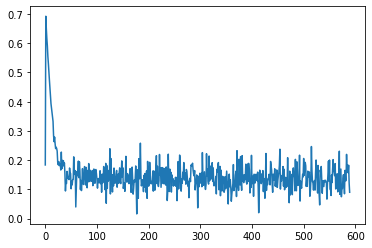

In [37]:
import matplotlib.pyplot as plt
plt.plot(loss_over_time)

In [38]:
dataiter = iter(train_loader)
input_data, labels = dataiter.next()
lstm_model(input_data) >= 0.5

tensor([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=torch.uint8)

In [39]:
labels

tensor([[0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_classification(y, y_hat, y_proba):
    return {
        "Accuracy": accuracy_score(y, y_hat),
        "Precision": precision_score(y, y_hat),
        "Recall": recall_score(y, y_hat),
        "F1-score": f1_score(y, y_hat),
        "AUC": roc_auc_score(y, y_proba),
    }


In [77]:
import numpy as np
num_classes = 6
# initialize tensor and lists to monitor test loss and accuracy
test_loss = torch.zeros(1)
class_correct = list(0. for i in range(num_classes))
class_total = list(0. for i in range(num_classes))

# set the module to evaluation mode
lstm_model.eval()

# get the input images and their corresponding labels
inputs, labels = test_loader.dataset.tensors

# forward pass to get outputs
outputs = lstm_model(inputs)

# calculate the loss
loss = criterion(outputs, labels)

# update average test loss 
test_loss = test_loss + ((torch.ones(1) / (len(labels) + 1)) * (loss.data - test_loss))

# get the predicted class from the maximum value in the output-list of class scores
metrics = {}
for j in range(num_classes):
    

    # compare predictions to true label
    predicted_class = np.round(outputs.data[:,j])
    labels_class = labels.data[:,j]
    class_total[j] = len(labels)
    class_correct[j] = (labels_class==predicted_class).sum()
    metrics[label_colnames[j]] = evaluate_classification(labels_class, predicted_class, outputs.data[:,j])#(predicted_class == labels_class).sum()
              
print('Test Loss: {:.6f}\n'.format(test_loss.numpy()[0]))

for i in range(num_classes):
    
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            label_colnames[i], 100 * class_correct[i] / class_total[i],
            (class_correct[i]), (class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (label_colnames[i]))
    
for metric in metrics[label_colnames[j]].keys():         
    print('------------------------------------------------------------------------------')
    for i in range(num_classes):
        if class_total[i] > 0:
            print('Test ' + metric +' of %5s: %2d%%' % (
                label_colnames[i], metrics[label_colnames[i]][metric]))
        else:
            print('Test Accuracy of %5s: N/A (no training examples)' % (label_colnames[i]))        
    print('------------------------------------------------------------------------------')
        
print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.000056

Test Accuracy of toxic: 90% (2262/2500)
Test Accuracy of severe_toxic: 99% (2476/2500)
Test Accuracy of obscene: 94% (2361/2500)
Test Accuracy of threat: 99% (2492/2500)
Test Accuracy of insult: 94% (2368/2500)
Test Accuracy of identity_hate: 99% (2484/2500)
------------------------------------------------------------------------------
Test Accuracy of toxic:  0%
Test Accuracy of severe_toxic:  0%
Test Accuracy of obscene:  0%
Test Accuracy of threat:  0%
Test Accuracy of insult:  0%
Test Accuracy of identity_hate:  0%
------------------------------------------------------------------------------
------------------------------------------------------------------------------
Test Precision of toxic:  1%
Test Precision of severe_toxic:  0%
Test Precision of obscene:  0%
Test Precision of threat:  0%
Test Precision of insult:  0%
Test Precision of identity_hate:  0%
------------------------------------------------------------------------------
------------------------

/Users/yc00086/miniconda/envs/conda3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/yc00086/miniconda/envs/conda3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/yc00086/miniconda/envs/conda3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/yc00086/miniconda/envs/conda3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, wa

In [76]:
metrics

{'toxic': {'Accuracy': 0.9048,
  'Precision': 1.0,
  'Recall': 0.0205761316872428,
  'F1-score': 0.04032258064516129,
  'AUC': 0.5287537081708302},
 'severe_toxic': {'Accuracy': 0.9904,
  'Precision': 0.0,
  'Recall': 0.0,
  'F1-score': 0.0,
  'AUC': 0.5408779074033312},
 'obscene': {'Accuracy': 0.9444,
  'Precision': 0.0,
  'Recall': 0.0,
  'F1-score': 0.0,
  'AUC': 0.5188281395214197},
 'threat': {'Accuracy': 0.9968,
  'Precision': 0.0,
  'Recall': 0.0,
  'F1-score': 0.0,
  'AUC': 0.5512389646869984},
 'insult': {'Accuracy': 0.9472,
  'Precision': 0.6666666666666666,
  'Recall': 0.015037593984962405,
  'F1-score': 0.029411764705882353,
  'AUC': 0.5252310116228467},
 'identity_hate': {'Accuracy': 0.9936,
  'Precision': 0.0,
  'Recall': 0.0,
  'F1-score': 0.0,
  'AUC': 0.5392134661835748}}